In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
import numpy as np
import pandas as pd
from fractions import Fraction as ft

original_df = pd.read_csv("rt.reviews.tsv",encoding='windows-1254',delimiter = '\t')
df = original_df.copy()
original_df2 = pd.read_csv('rt.movie_info.tsv',encoding='windows-1254',delimiter = '\t')
df2 = original_df2.copy()

In [81]:
def convert(s):
    try:
        return float(s)
    except ValueError:
        num, denom = s.split('/')
        return float(num) / float(denom)

In [82]:
def isFloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [83]:
merged_df = df.merge(df2,on='id').copy()

In [115]:
merged_df.rating_x = merged_df.rating_x.astype(str)

In [117]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'N'].index,inplace=True)

In [119]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'R'].index,inplace=True)

In [120]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'T'].index,inplace=True)

In [93]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

In [92]:
merged_df.rating_x.replace(to_replace = '3 1/2', value = 3.5, inplace = True)

In [107]:
merged_df.rating_x.replace(to_replace = 'F-', value = 0, inplace = True)

In [84]:
for x in merged_df.rating_x:
    try:
        merged_df.rating_x.replace(x,convert(x),inplace=True)
    except ValueError:
        pass

In [72]:
merged_df['rating_x'] = merged_df.rating_x.astype(str)

In [128]:
letter_grades = []
for x in merged_df.rating_x:
    if not(isFloat(x)):
        letter_grades.append(x)

In [129]:
set(letter_grades)

set()

In [97]:
for x in merged_df.rating_x:
    for y in letter_grades:
        if x == y:
            if x == 'A':
                merged_df.rating_x.replace(to_replace='A',value=9,inplace=True)
            elif x == 'A+':
                merged_df.rating_x.replace(to_replace='A+',value=10,inplace=True)
            elif x == 'A-':
                merged_df.rating_x.replace(to_replace='A-',value=8.5,inplace=True)
            elif x =='B+':
                merged_df.rating_x.replace(to_replace='B+',value=8,inplace=True)
            elif x == 'B':
                merged_df.rating_x.replace(to_replace='B',value=7,inplace=True)
            elif x == 'B-':
                merged_df.rating_x.replace(to_replace='B-',value=6.5,inplace=True)
            elif x == 'C+':
                merged_df.rating_x.replace(to_replace='C+',value=6,inplace=True)    
            elif x == 'C':
                merged_df.rating_x.replace(to_replace='C',value=5,inplace=True)
            elif x == 'C-':
                merged_df.rating_x.replace(to_replace='C-',value=4.5,inplace=True)
            elif x == 'D+':
                merged_df.rating_x.replace(to_replace='D+',value=4,inplace=True)
            elif x == 'D':
                merged_df.rating_x.replace(to_replace='D',value=3,inplace=True)
            elif x == 'D-':
                merged_df.rating_x.replace(to_replace='D-',value=2.5,inplace=True)
            elif x == 'F+':
                merged_df.rating_x.replace(to_replace='F+',value=2,inplace=True)
            elif x == 'F':
                merged_df.rating_x.replace(to_replace='F',value=1,inplace=True)

In [130]:
merged_df = merged_df[pd.notnull(merged_df['rating_x'])]

In [124]:
merged_df.rating_x = merged_df['rating_x'].astype('float64')

In [181]:
merged_df_box = merged_df.copy()

In [182]:
merged_df_box.dropna(subset=['box_office'], inplace=True)

In [269]:
group_id_mean = merged_df_box.groupby('id').mean()

In [199]:
group_id_max = merged_df_box.groupby('id').max()

In [226]:
group_id_max.genre.value_counts()

Drama                                                                      41
Comedy                                                                     36
Comedy|Drama                                                               23
Drama|Mystery and Suspense                                                 12
Comedy|Drama|Romance                                                       11
                                                                           ..
Action and Adventure|Horror|Kids and Family|Science Fiction and Fantasy     1
Drama|Science Fiction and Fantasy                                           1
Comedy|Mystery and Suspense                                                 1
Art House and International|Drama|Special Interest                          1
Action and Adventure|Animation|Comedy                                       1
Name: genre, Length: 89, dtype: int64

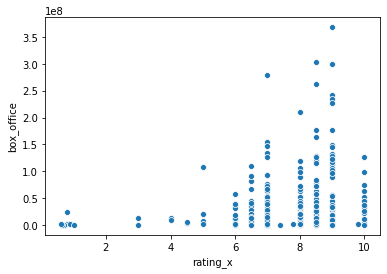

In [212]:
sns.scatterplot(group_id_max.rating_x,group_id_max.box_office, data=group_id_max)

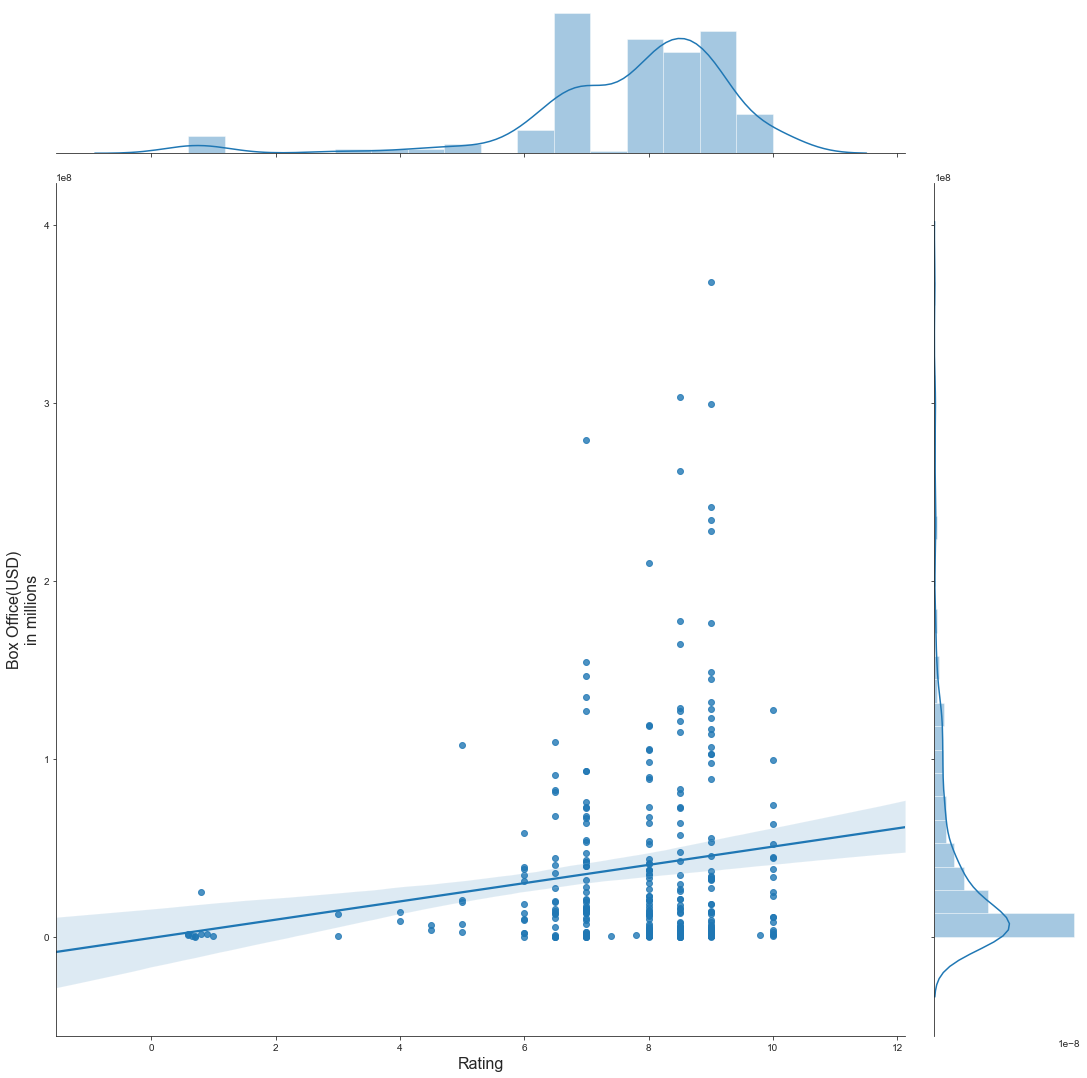

In [372]:
jointplot_rating_box = sns.jointplot(group_id_max.rating_x, group_id_max.box_office, data=group_id_max, kind='reg',height=15)
jointplot_rating_box.set_axis_labels('Rating', 'Box Office(USD)\nin millions', fontsize=16);


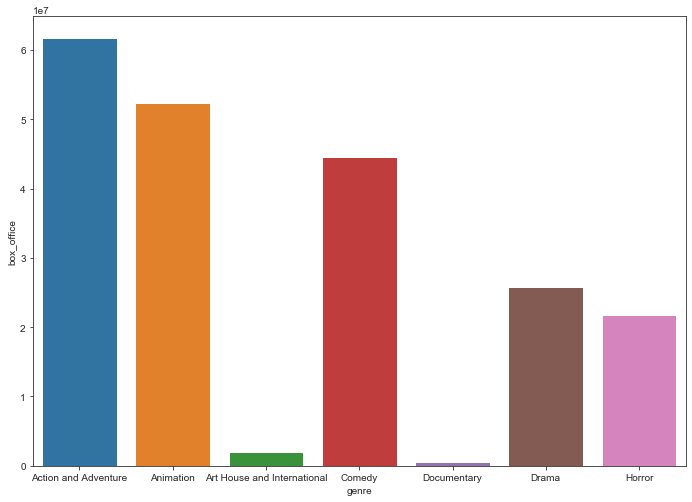

In [346]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['box_office'].mean(),
                              ax=ax);  

In [309]:
group_id_max.groupby('genre')['box_office'].mean()

genre
Action and Adventure           6.177522e+07
Animation                      5.233580e+07
Art House and International    2.027701e+06
Comedy                         4.456114e+07
Documentary                    4.842830e+05
Drama                          2.579894e+07
Horror                         2.174063e+07
Misc                           5.554693e+07
Name: box_office, dtype: float64

In [281]:
group_id_max[group_id_max['genre'] == 'Kids and Family|Science Fiction and Fantasy']

,rating_x,fresh,top_critic,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,
1442,8.5,rotten,1,"September 30, 2005",Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892,161 minutes,Warner Bros. Pictures


In [287]:
for x in group_id_max.genre:
    if x.startswith('Action and Adventure'):
        group_id_max.genre.replace(to_replace=x,value='Action and Adventure',inplace=True)

In [289]:
for x in group_id_max.genre:
    if x.startswith('Drama'):
        group_id_max.genre.replace(to_replace=x,value='Drama',inplace=True)

In [291]:
for x in group_id_max.genre:
    if x.startswith('Comedy'):
        group_id_max.genre.replace(to_replace=x,value='Comedy',inplace=True)

In [295]:
for x in group_id_max.genre:
    if x.startswith('Art House and International'):
        group_id_max.genre.replace(to_replace=x,value='Art House and International',inplace=True)

In [296]:
for x in group_id_max.genre:
    if x.startswith('Horror'):
        group_id_max.genre.replace(to_replace=x,value='Horror',inplace=True)

In [300]:
for x in group_id_max.genre:
    if x.startswith('Animation'):
        group_id_max.genre.replace(to_replace=x,value='Animation',inplace=True)

In [302]:
for x in group_id_max.genre:
    if x.startswith('Documentary'):
        group_id_max.genre.replace(to_replace=x,value='Documentary',inplace=True)

In [307]:
for x in group_id_max.genre:
    if (x.startswith('Mystery')) or (x.startswith('Kids and')) or (x.startswith('Classics')):
        group_id_max.genre.replace(to_replace=x,value='Misc',inplace=True)

In [324]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

      rating_x   fresh  top_critic                date  \
id                                                       
1442       8.5  rotten           1  September 30, 2005   

                                               synopsis rating_y genre  \
id                                                                       
1442  Youthful wizard Harry Potter returns to the sc...       PG  Misc   

            director        writer  theater_date      dvd_date currency  \
id                                                                        
1442  Chris Columbus  Steve Kloves  Nov 15, 2002  Apr 11, 2003        $   

      box_office      runtime                 studio  
id                                                    
1442   261835892  161 minutes  Warner Bros. Pictures  


In [327]:
group_id_max.genre.drop(group_id_max[group_id_max.genre == 'Misc'].index, inplace=True)

In [328]:
group_id_max.genre.value_counts()

Comedy                         95
Drama                          81
Action and Adventure           69
Art House and International    23
Horror                         10
Animation                      10
Documentary                     6
Name: genre, dtype: int64

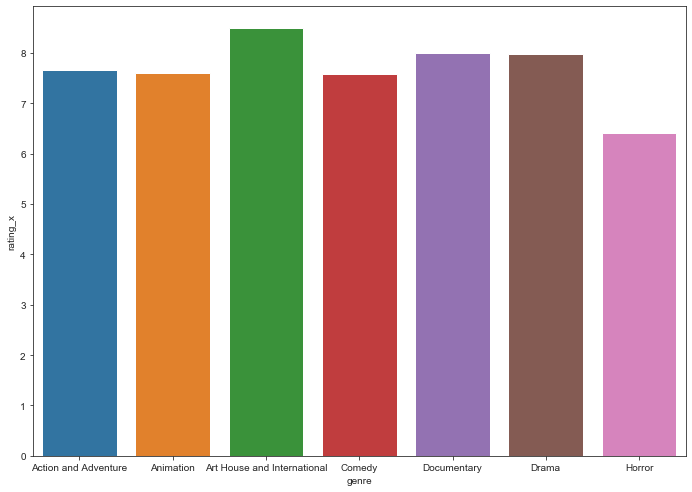

In [373]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['rating_x'].mean(),
                              ax=ax);  